<a href="https://colab.research.google.com/github/DmitriyDikunov/python-4-7/blob/main/%D0%9B%D0%B0%D0%B13_%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Описові статистики:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   

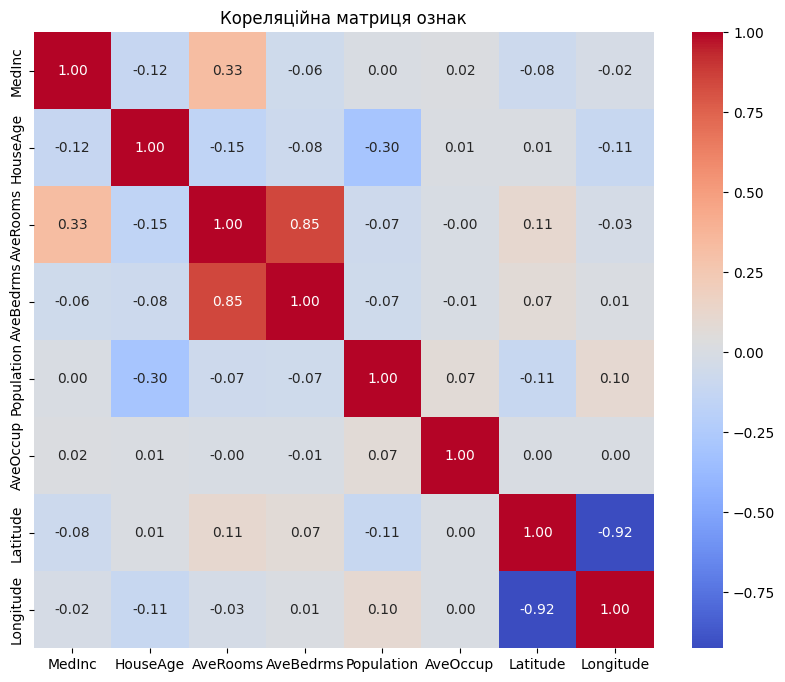

In [2]:
print("\nІнформація про дані:")
print(X.info())
print("\nОписові статистики:")
print(X.describe())
print("\nПропущені значення:")
print(X.isnull().sum())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця ознак')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

ridge = Ridge()
param_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)
grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("\nЛінійна регресія:")
print(f"R2: {r2_lr:.4f}, MSE: {mse_lr:.4f}")
print("\nВипадковий ліс:")
print(f"R2: {r2_rf:.4f}, MSE: {mse_rf:.4f}")
print(f"Найкращі параметри: {grid_rf.best_params_}")
print("\nRidge регресія:")
print(f"R2: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}")
print(f"Найкращі параметри: {grid_ridge.best_params_}")

In [ ]:
import matplotlib.pyplot as plt
models = ['Linear Regression', 'Random Forest', 'Ridge Regression']
r2_scores = [r2_lr, r2_rf, r2_ridge]
mse_scores = [mse_lr, mse_rf, mse_ridge]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color='skyblue')
plt.title('R2 Scores')
plt.ylabel('R2')
plt.subplot(1, 2, 2)
plt.bar(models, mse_scores, color='salmon')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

Модель випадкового лісу показала найкращі результати з найвищим R² і найнижчим MSE. Лінійна регресія виявилася найслабшою, а Ridge регресія показала середні результати. Випадковий ліс виявився найефективнішою моделлю.